In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path = 'steam.csv'  # Adjust the file path if necessary
data = pd.read_csv(file_path)

In [3]:
data.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [4]:
data.info()

data.describe()

data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

,0
appid,0
name,0
release_date,0
english,0
developer,1
publisher,14
platforms,0
required_age,0
categories,0
genres,0


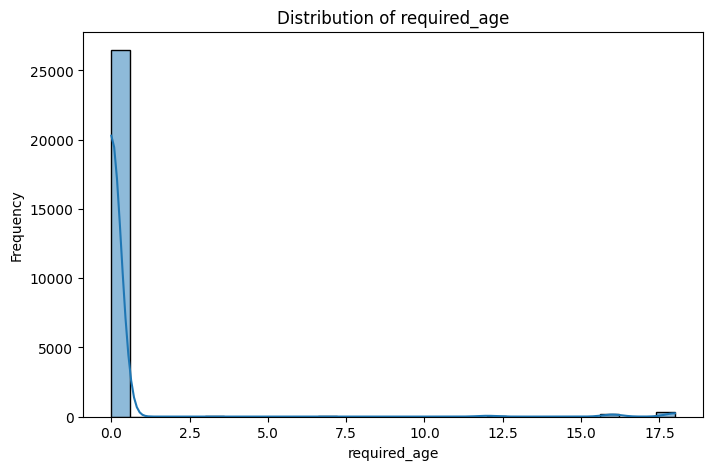

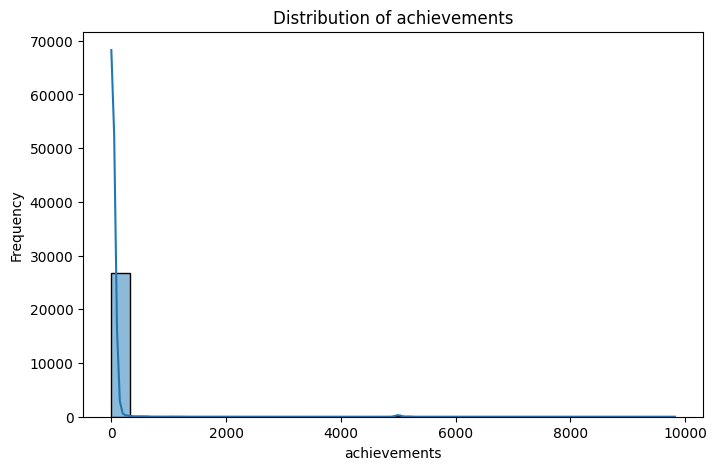

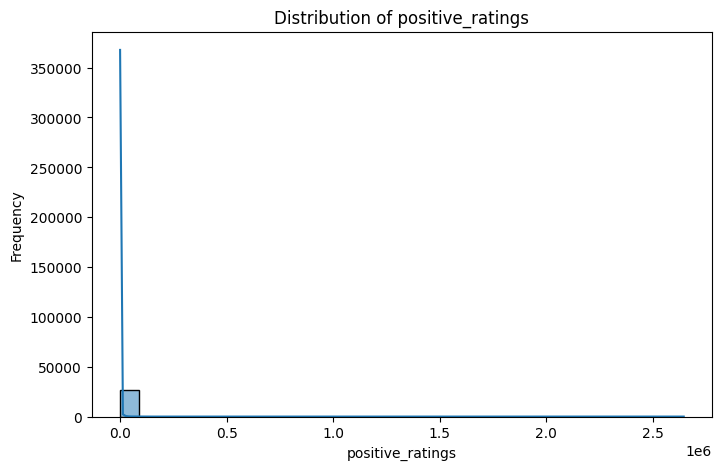

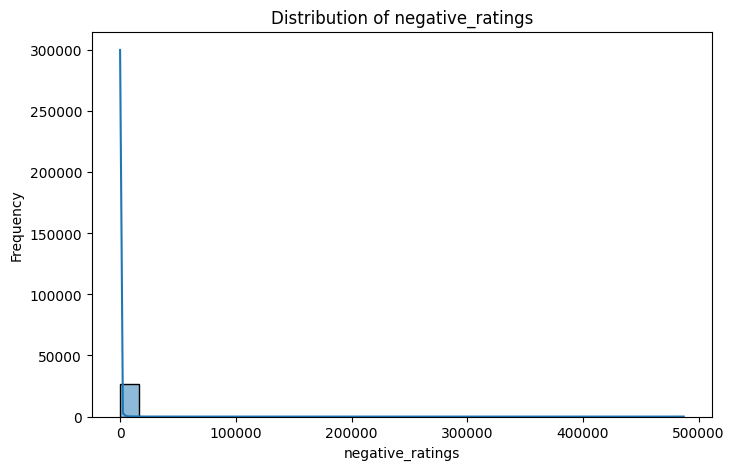

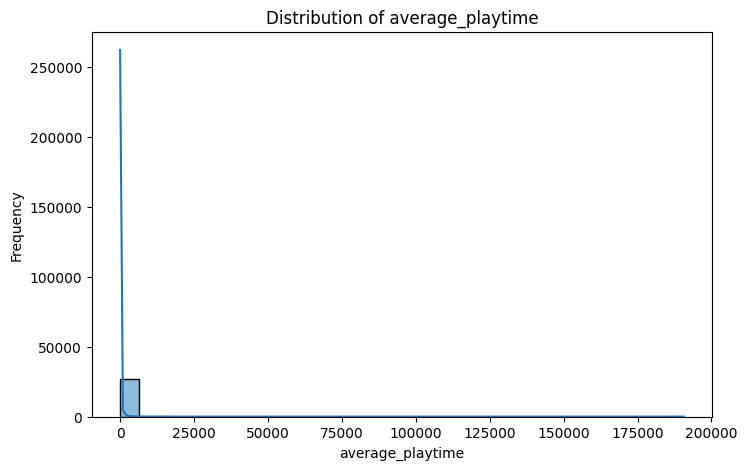

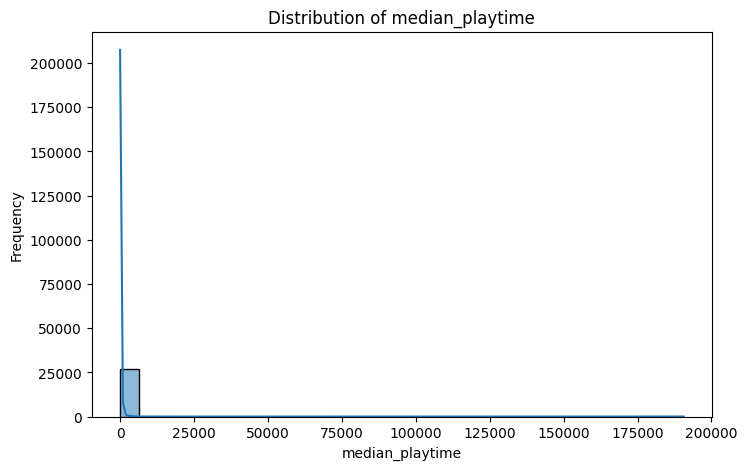

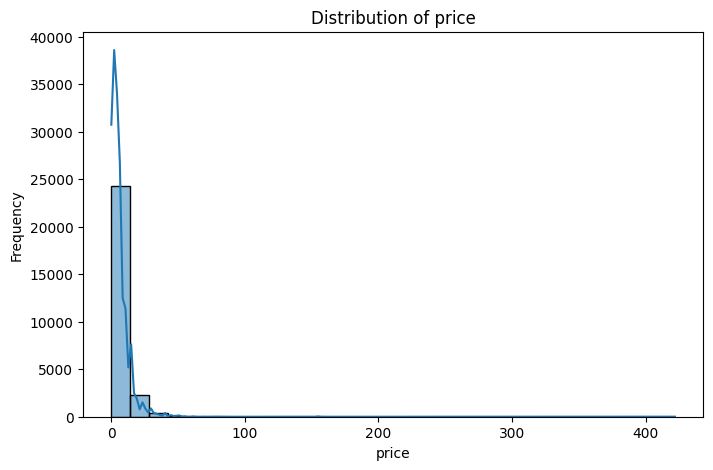

In [5]:

numeric_columns = ['required_age', 'achievements', 'positive_ratings',
                   'negative_ratings', 'average_playtime', 'median_playtime', 'price']

for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


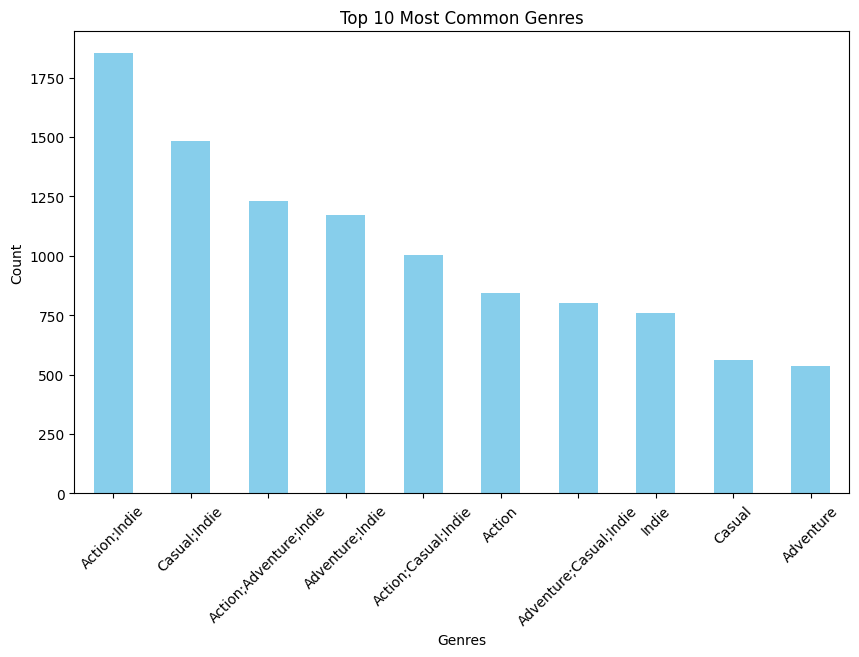

In [6]:
plt.figure(figsize=(10, 6))
data['genres'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

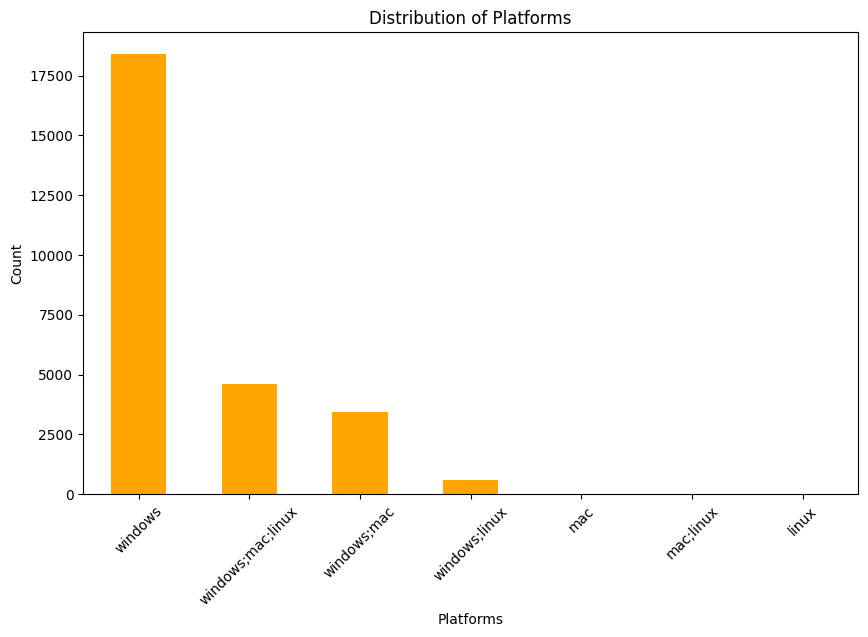

In [7]:
plt.figure(figsize=(10, 6))
data['platforms'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Distribution of Platforms')
plt.xlabel('Platforms')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


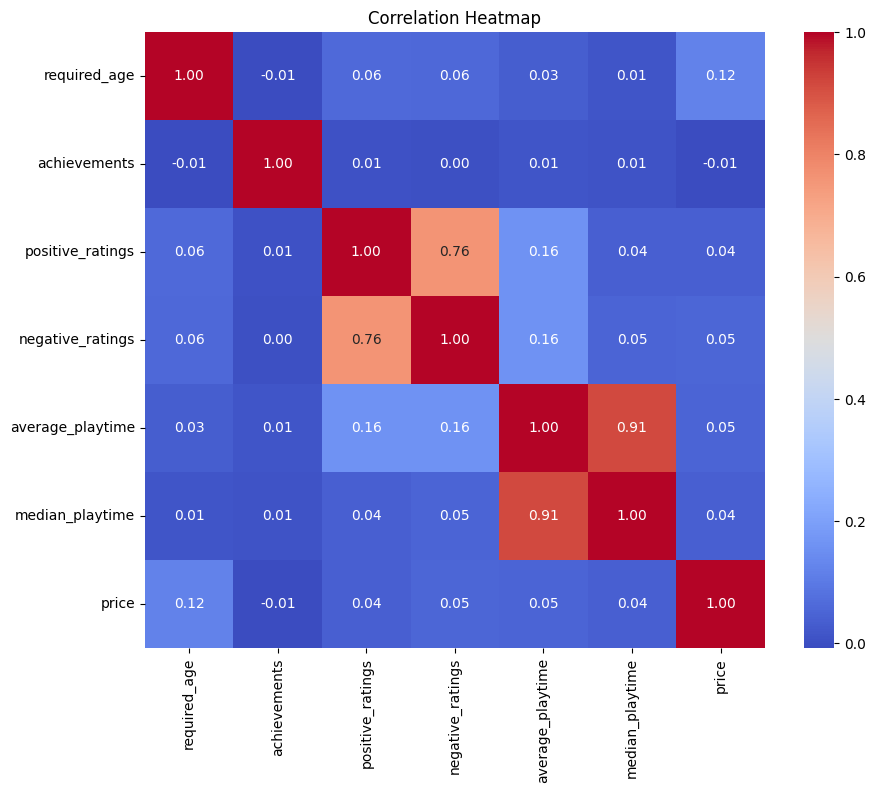

In [8]:
corr = data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

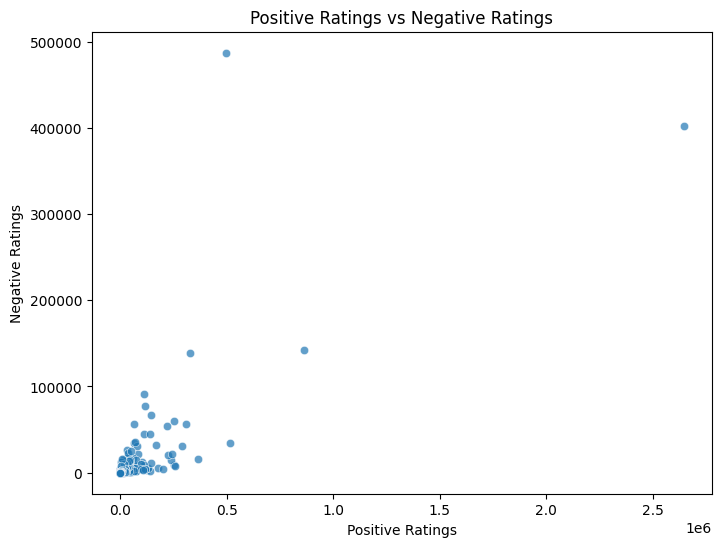

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='positive_ratings', y='negative_ratings', data=data, alpha=0.7)
plt.title('Positive Ratings vs Negative Ratings')
plt.xlabel('Positive Ratings')
plt.ylabel('Negative Ratings')
plt.show()

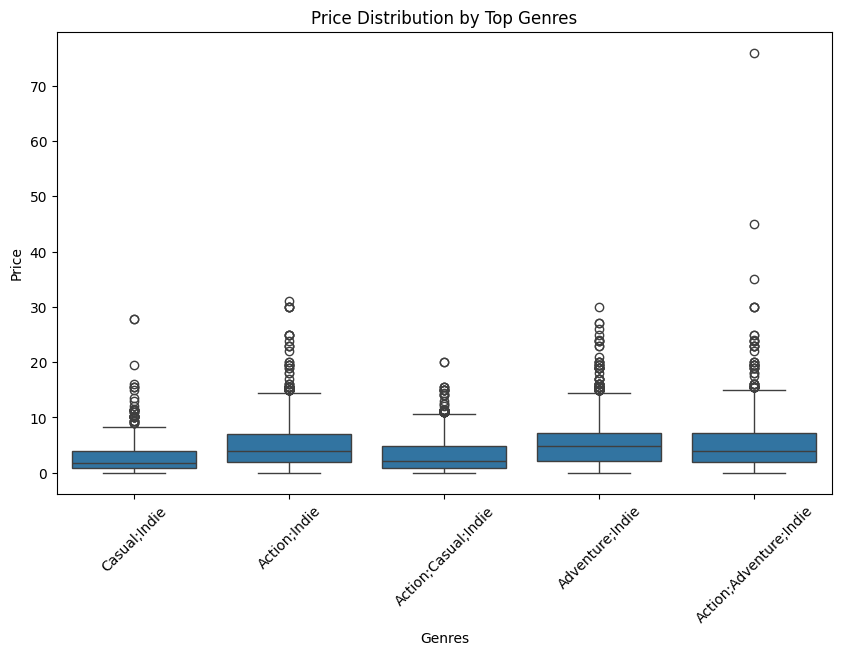

In [10]:
top_genres = data['genres'].value_counts().head(5).index
filtered_data = data[data['genres'].isin(top_genres)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='genres', y='price', data=filtered_data)
plt.title('Price Distribution by Top Genres')
plt.xlabel('Genres')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


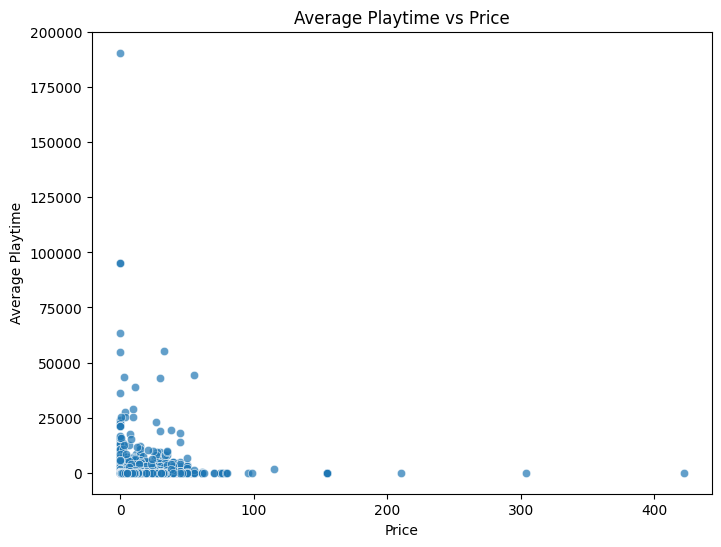

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='average_playtime', data=data, alpha=0.7)
plt.title('Average Playtime vs Price')
plt.xlabel('Price')
plt.ylabel('Average Playtime')
plt.show()

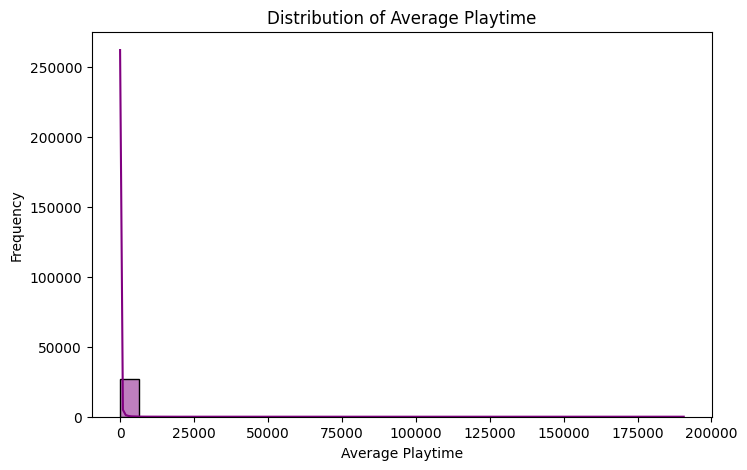

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(data['average_playtime'], kde=True, bins=30, color='purple')
plt.title('Distribution of Average Playtime')
plt.xlabel('Average Playtime')
plt.ylabel('Frequency')
plt.show()